# Airport

## Introduction 

In this assignment we are to answer three questions posed in the assignment description.  The questions we are to answer are the following:  

1. What is the northernmost airport in the United States?
2. What is the easternmost airport in the United States?
3. On February 12th, 2013, which New York area airport had the windiest weather?

The data to complete the assignment came from the following GitHub repository (https://github.com/hadley/nycflights13/tree/master/data-raw)

In the assignment description it was sugggested to output the 5 top values after the analysis is given.  A few other things to keep in mind is how the measurments are taken. The data should be consistent and no errors exist in the data file that is provided. 

### Preparation of the data for airport questions of northernmost and eastern most airports.

The first thing that we need to do is to read the data from the airports.csv file into a frame.  Reading it into a frame will make it easier to find the largest values for the given questions.  The code to read the data into the file is shown below.

In [17]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

filepath_airports = 'airports.csv'

pd.set_option('display.max_columns', None)

# Create the airports data frame
airport_frame = pd.read_csv(filepath_airports, sep=",")

print(airport_frame.head())

   faa                           name        lat        lon   alt   tz dst  \
0  04G              Lansdowne Airport  41.130472 -80.619583  1044 -5.0   A   
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264 -6.0   A   
2  06C            Schaumburg Regional  41.989341 -88.101243   801 -6.0   A   
3  06N                Randall Airport  41.431912 -74.391561   523 -5.0   A   
4  09J          Jekyll Island Airport  31.074472 -81.427778    11 -5.0   A   

              tzone  
0  America/New_York  
1   America/Chicago  
2   America/Chicago  
3  America/New_York  
4  America/New_York  


As a check to make sure the data has been read into the frame the first five rows have been outputted.  The next step to perform is to find the northernmost airport.

### What is the northernmost airport in the United States ?

In order to determine which airport is the norternmost in the United States we need to understand how the lattitude and longitude work.  In lattitude the measurment are either postive or negative based on whether or not the postions lie north or south of the equator.  Since the airports that we are looking for all reside north of the equator.  We will be looking for the largest value found in the lattitude of the column of the frame. In order to find the norternmost airport we can use a method that is found in the pandas library.  This function is ```.nlargest```.  With this function you can easily find the largest value of the frame within a given column. The code to accomplish this is shown below.  I have outputted the first five rows of the result to comply with the assignment suggestion.


In [18]:
#Find the northernmost airport 
northernmost_frame = airport_frame.nlargest(5, "lat")
print(northernmost_frame)

     faa                                        name        lat         lon  \
417  EEN                     Dillant Hopkins Airport  72.270833   42.898333   
230  BRW                  Wiley Post Will Rogers Mem  71.285446 -156.766003   
110  AIN                          Wainwright Airport  70.638056 -159.994722   
708  K03                               Wainwright As  70.613378 -159.860350   
152  ATK  Atqasuk Edward Burnell Sr Memorial Airport  70.467300 -157.436000   

     alt   tz dst              tzone  
417  149 -5.0   A                 \N  
230   44 -9.0   A  America/Anchorage  
110   41 -9.0   A  America/Anchorage  
708   35 -9.0   A  America/Anchorage  
152   96 -9.0   A  America/Anchorage  


Analysis of the output of the shows that Dillant Hopkins Airport is the northernmost airport.  Upon further inspection this is not true.  Using [Airnav.com](https://www.airnav.com/airport/KEEN) and entering the airport code EEN. I was able to retrieve the lattitude and the longitude.  The values given in the supplied file are incorrect the lattitude and longitude are the following: 42.8983889,-72.2707778.  The lattitude is given as 42.8983889 on the site and in the file it is 72.270833.  The coordinates given and location place it in Keene, NH.  
The next candidate is Wiley Post Will Rogers Memorial.  Using the same site [Airnav.com](https://www.airnav.com/airport/PABR) we can confirm that this airport's information is correct. So the answer is **Wiley Post Will Rogers Memorial Airport**. 

### What is the easternmost airport in the United States?

In determining the answer to this question we need to look at how longitude is done in this file.  THe measurements are taken from the Prime Meridian.  We lie to the west of the Prime Meridian so out values would be in the negative range.  We can assume that we will reference the east coast of the United States as the starting point for us.  To get the value of the easternmost we can use similar code to the first question.  The code is given below


In [19]:
#Find the easternmost airport in the United States
easternmost_frame = airport_frame.nlargest(10, "lon")
print (easternmost_frame)


      faa                                 name        lat         lon   alt  \
1290  SYA                         Eareckson As  52.712275  174.113620    98   
942   MYF                     Montgomery Field  32.475900  117.759000    17   
396   DVT        Deer Valley Municipal Airport  33.411700  112.457000  1478   
417   EEN              Dillant Hopkins Airport  72.270833   42.898333   149   
444   EPM           Eastport Municipal Airport  44.910111  -67.012694    45   
624   HUL                         Houlton Intl  46.123083  -67.792056   489   
259   CAR                         Caribou Muni  46.871500  -68.017917   626   
1101  PQI  Northern Maine Rgnl At Presque Isle  46.688958  -68.044797   534   
1398  WFK  Northern Aroostook Regional Airport  47.285556  -68.312778   988   
192   BHB          Hancock County - Bar Harbor  44.449769  -68.361565    83   

       tz dst              tzone  
1290 -9.0   A  America/Anchorage  
942   8.0   A     Asia/Chongqing  
396   8.0   A     Asia/Ch

There are a few airports that could be in contention for the easternmost airport.  If we define the east cost as the starting point of the Uited States the answer would be **Eastport Municipal Airport** but if we measure from the Meridan than we need to look into airports that are in Alaska. So **Eareckson Air Station** would be a potential candidtate.  The true answer lies in how to interpret the easternmost relative to point of measure.

###  On February 12th, 2013, which New York area airport had the windiest weather?

In this question we are to look for the windiest airport in the New York area.  In order to do this wee need to look at the weather.csv file which contains this information.  We read the data in the same way for the previous question.  

In [20]:
#create a frame to hold the weather data.
filepath_weather = 'weather.csv'
weather_frame = pd.read_csv(filepath_weather, sep=',')

#filter the weather data to get the desired date range
weather_feb_12 = weather_frame[(weather_frame['month'] == 2) 
& (weather_frame['day'] == 12) & (weather_frame['year'] == 2013)]

#confirm dataframe was created
print(weather_feb_12.head())

     origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
1006    EWR  2013      2   12     0  39.92  39.02  96.55     240.0   
1007    EWR  2013      2   12     1  39.92  37.94  92.56     250.0   
1008    EWR  2013      2   12     2  39.92  28.04  62.21     270.0   
1009    EWR  2013      2   12     3  39.02  26.96  61.63     260.0   
1010    EWR  2013      2   12     4  39.02  26.96  64.29     280.0   

      wind_speed  wind_gust  precip  pressure  visib             time_hour  
1006     6.90468        NaN     0.0    1006.9   10.0  2013-02-12T05:00:00Z  
1007     9.20624        NaN     0.0    1007.2   10.0  2013-02-12T06:00:00Z  
1008    20.71404   25.31716     0.0    1007.8   10.0  2013-02-12T07:00:00Z  
1009  1048.36058        NaN     0.0    1008.3   10.0  2013-02-12T08:00:00Z  
1010    12.65858        NaN     0.0    1008.8   10.0  2013-02-12T09:00:00Z  


In [21]:
#clean up the list
drop_lst = [1,2,3,4,5,6,7,8] 
drop_lst2 = [2,3,4,5,6]

weather_feb_12.drop(weather_feb_12.columns[drop_lst], axis=1, inplace=True)
weather_feb_12.drop(weather_feb_12.columns[drop_lst2], axis=1, inplace=True)

#Confirm that the unneeded columns were dropped from the frame
print (weather_feb_12.head())


     origin  wind_speed
1006    EWR     6.90468
1007    EWR     9.20624
1008    EWR    20.71404
1009    EWR  1048.36058
1010    EWR    12.65858


In [22]:
#Find the largest
windiest_frame = weather_feb_12.nlargest(1, 'wind_speed')


#Clean up the airports froma get rid of unneeded columns
air_drop = [2,3,4,5,6,7]
air_drop_frame = airport_frame.drop(airport_frame.columns[air_drop], axis=1)


#join to get the airport information 
answer_frame = pd.merge(air_drop_frame, windiest_frame, left_on='faa', right_on='origin')


print (answer_frame)

   faa                 name origin  wind_speed
0  EWR  Newark Liberty Intl    EWR  1048.36058


Based on the final join the airport that was windiest on February 12, 2013 was Newark Liberty airport.   It had a wind speed of 1048.36058. So the final answer is **Newark Liberty airport**.  If we investigate this information we can infer that the wind_speed is wrong.

### Map of Airports in this exercise.

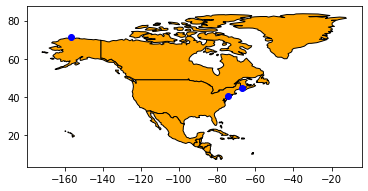

In [23]:
# Create the data frame with airport data
airport_data_frame = pd.DataFrame({'Airport':['Wiley Post Will Rodgers Memorial', 
                                              'Eastport Municipal Airport',
                                              'Newark Liberty Airport'],'Latitude':[71.285446, 44.910111, 40.6925 ], 'Longitude': [-156.766003,- 67.012694, -74.168667
]}
        )

geo_air_frame = gp.GeoDataFrame(airport_data_frame, geometry=gp.points_from_xy(airport_data_frame.Longitude, 
                                                                               airport_data_frame.Latitude))


north_america = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

ax = north_america[north_america.continent == 'North America'].plot(color='orange',
                  edgecolor='black')

geo_air_frame.plot(ax=ax, color='blue')

plt.show()



